In [31]:
import pandas as pd
import numpy as np

from sklearn.model_selection import (train_test_split,
                                    RandomizedSearchCV,
                                    learning_curve,
                                    validation_curve,
                                    ShuffleSplit)

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.utils import check_random_state
from sklearn.metrics import accuracy_score
import warnings; warnings.simplefilter('ignore')

In [2]:
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = (7, 3)

In [3]:
class Solver:
    def __init__(self):
        self.datasets = [None, None]
solver = Solver()

# Classification Problem (Testing) 1: Spotify Song Attributes

Problem: Given list of attributes-carrying songs on spotify, labelled with sentiment ('like' or 'dislike') of a given person, predict the sentiment of that person towards a newly seen song.

## Description of Dataset

- Number of attributes: 13
- Number of instances: 2017
- Output: binary
- Source: [kaggle](https://www.kaggle.com/geomack/spotifyclassification/version/1)

In [4]:
""" Loading dataset """
df = pd.read_csv('data/spotify_classification.csv')

#""" Preliminary Exploratory Analysis """
# df.describe()
# df.head()
# df.info() # -> No missing data
# df.columns
# df.hist(figsize=(20, 15))

In [5]:
y_key = 'target'
excluded_keys = [y_key, # y-targets
                 'Unnamed: 0', # id
                 'mode', # unknown
                 'song_title', 'artist' # text data not handled
                ]

X, y = df.drop(columns=excluded_keys), df[y_key]
solver.datasets[0] = (X, y) # attributes and targets
# attribute_names = list(X.columns)

#""" Ensure: datasets[0] = (X, y) """

# Classification Problem (Testing) 2: Optical Recognition of Handwritten Digits Data Set

Problem: Given a list of hand-written digits and the label (the true digit being written), predict the written digit of a newly seen hand-written digit.

## Description of Dataset

- Number of attributes: 64 (pixel-wise grey levels, hence numerical)
- Number of instances: 1797 (Number of instances per class: ~180)
- Output: multiclass (10)
- Source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/optical+recognition+of+handwritten+digits)

In [6]:
# """
# # Classification Problem (Testing) 2: MNIST Hand-written digit classification

# Problem: Given a list of hand-written digits and the label (the true digit being written), predict the written digit of a newly seen hand-written digit 

# ### Description of Dataset

# - Number of attributes: 784 (pixel-wise grey levels, hence numerical)
# - Number of instances: 70000
# - Output: multiclass (10)

# ### Source

# - [github](https://github.com/amplab/datascience-sp14/blob/master/lab7/mldata/mnist-original.mat)
# - [Details on openml](https://www.openml.org/d/554)
# """

# """ Load dataset """
# from sklearn.datasets import fetch_mldata

# mnist = fetch_mldata('MNIST original', data_home='data/')
# X, y = mnist.data, mnist.target

# random_state = check_random_state(0)
# permutation = random_state.permutation(X.shape[0])
# X = X[permutation]
# y = y[permutation]
# X = X.reshape((X.shape[0], -1))

# solver.datasets[4] = (X, y)

# """ Ensure: datasets[1] = (X, y) """

In [7]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

# plt.gray()
# plt.matshow(digits.images[0]) 

solver.datasets[1] = (X, y)

#""" Ensure: datasets[1] = (X, y) """

In [8]:
# from sklearn.datasets import load_iris

# iris = load_iris()
# X, y = iris.data, iris.target

# # plt.gray()
# # plt.matshow(digits.images[0]) 

# # solver.datasets[2] = (X, y)
# solver.datasets.append((X, y))
# (X, y)

In [9]:
# from sklearn.datasets import load_wine

# wine = load_wine()
# X, y = wine.data, wine.target

# # solver.datasets[3] = (X, y)
# solver.datasets.append((X, y))
# (X, y)

In [10]:
# """
# # Classification Problem (Testing) 2: MNIST Hand-written digit classification

# Problem: Given a list of hand-written digits and the label (the true digit being written), predict the written digit of a newly seen hand-written digit 

# ### Description of Dataset

# - Number of attributes: 784 (pixel-wise grey levels, hence numerical)
# - Number of instances: 70000
# - Output: multiclass (10)

# ### Source

# - [github](https://github.com/amplab/datascience-sp14/blob/master/lab7/mldata/mnist-original.mat)
# - [Details on openml](https://www.openml.org/d/554)
# """

# """ Load dataset """
# from sklearn.datasets import fetch_mldata

# mnist = fetch_mldata('MNIST original', data_home='data/')
# X, y = mnist.data, mnist.target

# random_state = check_random_state(0)
# permutation = random_state.permutation(X.shape[0])
# X = X[permutation]
# y = y[permutation]
# X = X.reshape((X.shape[0], -1))

# # solver.datasets[4] = (X, y)
# solver.datasets.append((X, y))

# """ Ensure: datasets[1] = (X, y) """

# Dataset Choice

Small datasets, why?

Interesting problems? Argue

# Experiment Procedures

Description of curves

What does ShuffleSplit does?

Where is RandomSearchCV?

In [11]:
def plot_validation_curve(estimator, title, X, y, var_param_name, var_param_range, fixed_param_name, fixed_param_value, color, alpha, cv=None, ylim=None, verbose=0):
    """
    Generate a plot of 
    
    Parameters
    ----------
    ...
    """
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel(var_param_name)
    plt.ylabel("Percentage Error")
    train_scores, valid_scores = validation_curve(estimator, X, y, var_param_name, var_param_range, cv=cv, verbose=verbose)
    train_errors, valid_errors = 1.0 - train_scores, 1.0 - valid_scores
    
    train_errors_mean = np.mean(train_errors, axis=1)
    train_errors_std = np.std(train_errors, axis=1)
    valid_errors_mean = np.mean(valid_errors, axis=1)
    valid_errors_std = np.std(valid_errors, axis=1)
    plt.grid()

    plt.fill_between(var_param_range, train_errors_mean - train_errors_std,
                     train_errors_mean + train_errors_std, alpha=0.1,
                     color=color)
    plt.fill_between(var_param_range, valid_errors_mean - valid_errors_std,
                     valid_errors_mean + valid_errors_std, alpha=0.1, color=color)
    
    plt.plot(var_param_range, train_errors_mean, 'o-', color=color, alpha=alpha,
             label=f"Training error, {fixed_param_name} = {fixed_param_value}")
    plt.plot(var_param_range, valid_errors_mean, 'o-', color=color, alpha=alpha, linestyle='dashed',
             label=f"Cross-validation test error, {fixed_param_name} = {fixed_param_value}")

    plt.legend(loc="best")
    return plt

In [12]:
def plot_learning_curve(estimator, title, X, y, i, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), verbose=0):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Percentage Training Examples")
    plt.ylabel("Percentage Error")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    train_errors, test_errors = 1.0 - train_scores, 1.0 - test_scores
    
    train_errors_mean = np.mean(train_errors, axis=1)
    train_errors_std = np.std(train_errors, axis=1)
    test_errors_mean = np.mean(test_errors, axis=1)
    test_errors_std = np.std(test_errors, axis=1)
    plt.grid()
    
    train_sizes_percentages = train_sizes / np.max(train_sizes)

    plt.fill_between(train_sizes_percentages, train_errors_mean - train_errors_std,
                     train_errors_mean + train_errors_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes_percentages, test_errors_mean - test_errors_std,
                     test_errors_mean + test_errors_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes_percentages, train_errors_mean, 'o-', color="r", linestyle='dashed',
             label="Training error")
    plt.plot(train_sizes_percentages, test_errors_mean, 'o-', color="g", linestyle='dashed',
             label="Cross-validation test error")

    plt.legend(loc="best")
    return plt

# Algorithms, Results, Analyses

## Decision Trees

In [13]:
def validate_dt(max_depth, color='r', dataset_idx=0):
    title = "Model Complexity by Validation Curves, Decision Trees"
    max_leaf_nodes_range = np.linspace(2, 70, 20, dtype=np.int32)
    
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = DecisionTreeClassifier(max_depth=max_depth)
    plot_validation_curve(estimator, title, *solver.datasets[dataset_idx], "max_leaf_nodes", max_leaf_nodes_range,
                     "max_depth", max_depth, color, 0.9, cv=cv, ylim=(0.0, 1.0))

In [14]:
def train_dt(max_depth, max_leaf_nodes, dataset_idx=0):
    title = f"Effect of training set sizes by Learning Curves\n Decision Trees ($max\ depth={max_depth}, max\ leaf\ nodes={max_leaf_nodes}$)"
    
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
    plot_learning_curve(estimator, title, *solver.datasets[dataset_idx], 1, ylim=(0.00, 1.01), cv=cv, n_jobs=4)

### Problem 1: Hyperparameter Search and Cross-Validation

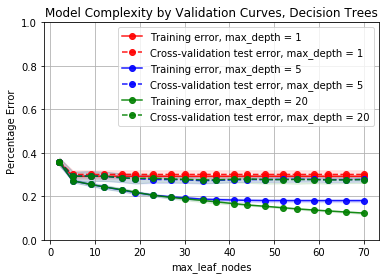

In [15]:
validate_dt(max_depth=1, color='r', dataset_idx=0)
validate_dt(max_depth=5, color='b', dataset_idx=0)
validate_dt(max_depth=20, color='g', dataset_idx=0)
plt.show()

From Fig 1.1.1 we can see that the training errors (except for max_depth=1) goes down with increasing model complexity, i.e. higher maximum number of lead nodes. In particular, the configuration max_depth=20 is successful in lowering the percentage error the most in the training scenario. However in the validation curve, all configurations of max_depth are performing simiarly, with max_depth=20 slightly better.

From Fig 1.1.1 we can see that the training errors (except for max_depth=1) goes down with increasing model complexity, i.e. higher maximum number of lead nodes. In particular, the configuration max_depth=20 is successful in lowering the percentage error the most in the training scenario. However in the validation curve, all configurations of max_depth are performing simiarly, with max_depth=20 slightly better.

### Problem 1: Effect of training set sizes and Learning Curve

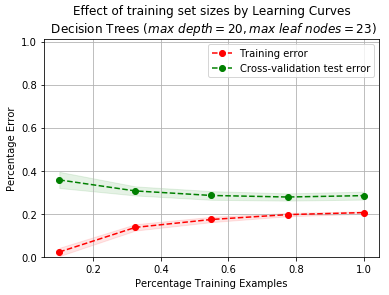

In [16]:
train_dt(max_depth=20, max_leaf_nodes=23, dataset_idx=0)
plt.show()

From this chart we can see that the training errors (except for max_depth=1) goes down with increasing model complexity, i.e. higher maximum number of lead nodes. In particular, the configuration max_depth=20 is successful in lowering the percentage error the most in the training scenario. However in the validation curve, all configurations of max_depth are performing simiarly, with max_depth=20 slightly better.

### Problem 2: Hyperparameter Search and Cross-Validation

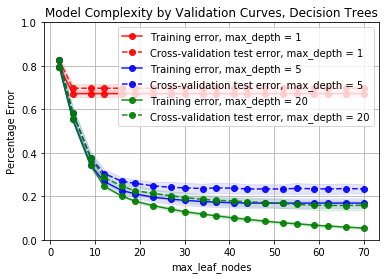

In [17]:
validate_dt(max_depth=1, color='r', dataset_idx=1)
validate_dt(max_depth=5, color='b', dataset_idx=1)
validate_dt(max_depth=20, color='g', dataset_idx=1)
plt.show()

From this chart we can see that the training errors (except for max_depth=1) goes down with increasing model complexity, i.e. higher maximum number of lead nodes. In particular, the configuration max_depth=20 is successful in lowering the percentage error the most in the training scenario. However in the validation curve, all configurations of max_depth are performing simiarly, with max_depth=20 slightly better.

From this chart we can see that the training errors (except for max_depth=1) goes down with increasing model complexity, i.e. higher maximum number of lead nodes. In particular, the configuration max_depth=20 is successful in lowering the percentage error the most in the training scenario. However in the validation curve, all configurations of max_depth are performing simiarly, with max_depth=20 slightly better.

### Problem 2: Effect of training set sizes and Learning Curve

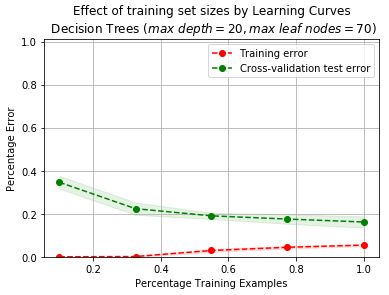

In [18]:
train_dt(max_depth=20, max_leaf_nodes=70, dataset_idx=1)
plt.show()

From this chart we can see that the training errors (except for max_depth=1) goes down with increasing model complexity, i.e. higher maximum number of lead nodes. In particular, the configuration max_depth=20 is successful in lowering the percentage error the most in the training scenario. However in the validation curve, all configurations of max_depth are performing simiarly, with max_depth=20 slightly better.

## Neural Networks

In [13]:
def validate_nn(num_hidden_layers, color='r', dataset_idx=0):
    title = "Model Complexity by Validation Curves, Neural Networks"
#     reg_strength_range = np.logspace(-5, 0, 12)
    batch_size_range = np.linspace(10, 200, 12, dtype=np.int32)
    hidden_layer_size = 100
    
    sample_fraction = 0.4 #0.7
    sample_size = int(sample_fraction * len(solver.datasets[dataset_idx][0]))
    X, y = solver.datasets[dataset_idx]
    random_idx = np.random.choice(X.shape[0], sample_size, replace=False)
    X, y = np.array(X)[random_idx, :], np.array(y)[random_idx]
    
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = MLPClassifier(hidden_layer_sizes=np.full((num_hidden_layers, ), hidden_layer_size), # tuple(hidden_layer_size for i in range(num_hidden_layers)),
                              solver='adam', activation='relu', learning_rate_init=1e-3)
    plot_validation_curve(estimator, title, X, y, "batch_size", batch_size_range, # "alpha", reg_strength_range,
                     "num_hidden_layers", num_hidden_layers, color, 0.9, cv=cv, ylim=(0.0, 0.5)
#                           , verbose=3
                         )

In [14]:
def train_nn(num_hidden_layers, batch_size, dataset_idx=0):
    title = f"Effect of training set sizes by Learning Curves\n Neural Networks ($num\ hidden\ layers={num_hidden_layers}, batch\ size={batch_size}$)"
    hidden_layer_size = 100
    
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = MLPClassifier(hidden_layer_sizes=np.full((num_hidden_layers, ), hidden_layer_size),
                              batch_size=batch_size,
                            solver='adam', activation='relu')
    plot_learning_curve(estimator, title, *solver.datasets[dataset_idx], 1, ylim=(0.00, 1.01), cv=cv, n_jobs=4)

### Problem 1: Hyperparameter Search and Cross-Validation

In [27]:
# validate_nn(num_hidden_layers=2, color='r', dataset_idx=3)
# validate_nn(num_hidden_layers=3, color='b', dataset_idx=3)
# validate_nn(num_hidden_layers=4, color='g', dataset_idx=3)
# plt.show()
# # 19 minutes -> up to 3rd search, 0.5 flat line
# # 5- minutes on lbfgs -> 0.5

In [28]:
# validate_nn(num_hidden_layers=1, color='r', dataset_idx=1)
# validate_nn(num_hidden_layers=5, color='b', dataset_idx=1)
# validate_nn(num_hidden_layers=10, color='g', dataset_idx=1)
# plt.show()
# # 19 minutes on solver.datasets[2] -> straight jump from percentage error 0 to 0.6-0.8
# # 13 minutes on solver.datasets[1] -> nice low error, num_hidden_layers=5
# # 7 minutes on solver.datasets[1] with adam -> batch_size / alpha needs zoom in

# # FIXME: Data size positively correlates with neural network score

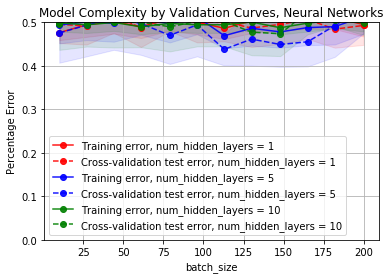

In [29]:
validate_nn(num_hidden_layers=1, color='r', dataset_idx=0)
validate_nn(num_hidden_layers=5, color='b', dataset_idx=0)
validate_nn(num_hidden_layers=10, color='g', dataset_idx=0)
plt.show()
# 19 minutes on solver.datasets[2] -> straight jump from percentage error 0 to 0.6-0.8

From this chart we can see that the training errors (except for max_depth=1) goes down with increasing model complexity, i.e. higher maximum number of lead nodes. In particular, the configuration max_depth=20 is successful in lowering the percentage error the most in the training scenario. However in the validation curve, all configurations of max_depth are performing simiarly, with max_depth=20 slightly better.

### Problem 1: Effect of training set sizes and Learning Curve

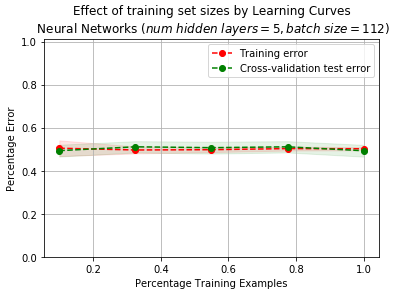

In [17]:
train_nn(num_hidden_layers=5, batch_size=112, dataset_idx=0)
plt.show()

From this chart we can see that the training errors (except for max_depth=1) goes down with increasing model complexity, i.e. higher maximum number of lead nodes. In particular, the configuration max_depth=20 is successful in lowering the percentage error the most in the training scenario. However in the validation curve, all configurations of max_depth are performing simiarly, with max_depth=20 slightly better.

### Problem 2: Hyperparameter Search and Cross-Validation

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


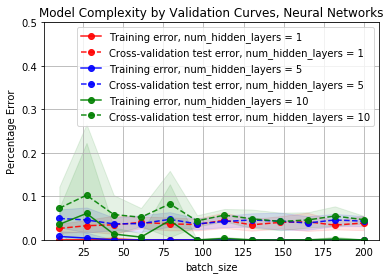

In [15]:
validate_nn(num_hidden_layers=1, color='r', dataset_idx=1)
validate_nn(num_hidden_layers=5, color='b', dataset_idx=1)
validate_nn(num_hidden_layers=10, color='g', dataset_idx=1)
plt.show()

From this chart we can see that the training errors (except for max_depth=1) goes down with increasing model complexity, i.e. higher maximum number of lead nodes. In particular, the configuration max_depth=20 is successful in lowering the percentage error the most in the training scenario. However in the validation curve, all configurations of max_depth are performing simiarly, with max_depth=20 slightly better.

### Problem 2: Effect of training set sizes and Learning Curve

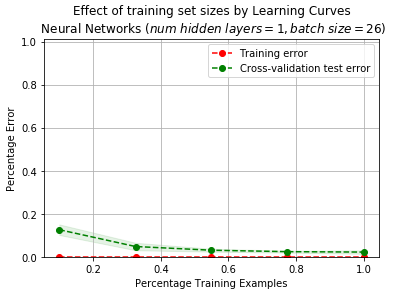

In [16]:
train_nn(num_hidden_layers=1, batch_size=26, dataset_idx=1)
plt.show()

From this chart we can see that the training errors (except for max_depth=1) goes down with increasing model complexity, i.e. higher maximum number of lead nodes. In particular, the configuration max_depth=20 is successful in lowering the percentage error the most in the training scenario. However in the validation curve, all configurations of max_depth are performing simiarly, with max_depth=20 slightly better.

## Boosting

Weak learner is said Decision Tree Classifier.

In [15]:
def validate_boosting(learning_rate, color='r', dataset_idx=0):
    title = "Model Complexity by Validation Curves, Boosting (Decision Trees)"
    n_estimators_range = np.linspace(1, 80, 12, dtype=np.int32)
    best_max_depth = 20
    
    sample_fraction = 0.4 #0.7
    sample_size = int(sample_fraction * len(solver.datasets[dataset_idx][0]))
    X, y = solver.datasets[dataset_idx]
    random_idx = np.random.choice(X.shape[0], sample_size, replace=False)
    X, y = np.array(X)[random_idx, :], np.array(y)[random_idx]

    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = AdaBoostClassifier(DecisionTreeClassifier(max_depth=best_max_depth), learning_rate=learning_rate)
    plot_validation_curve(estimator, title, X, y, "n_estimators", n_estimators_range,
                     "learning_rate", learning_rate, color, 0.9, cv=cv, ylim=(0.0, 0.5)
#                           , verbose=3
                         )

In [16]:
def train_boosting(learning_rate, n_estimators, dataset_idx=0):
    title = f"Effect of training set sizes by Learning Curves\n Boosting (Decision Trees) ($learning\ rate={learning_rate}, num\ estimators={n_estimators}$)"
    best_max_depth = 20
    
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = AdaBoostClassifier(DecisionTreeClassifier(max_depth=best_max_depth), learning_rate=learning_rate, n_estimators=n_estimators)
    plot_learning_curve(estimator, title, *solver.datasets[dataset_idx], 1, ylim=(0.00, 1.01), cv=cv, n_jobs=4)

### Problem 1: Hyperparameter Search and Cross-Validation

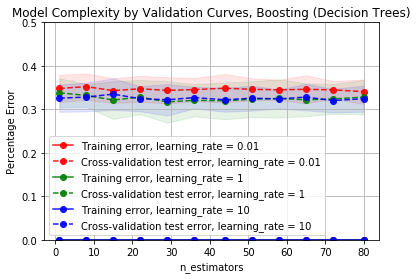

In [17]:
validate_boosting(learning_rate=0.01, color='r', dataset_idx=0)
validate_boosting(learning_rate=1, color='g', dataset_idx=0)
validate_boosting(learning_rate=10, color='b', dataset_idx=0)
plt.show()
# 5 minutes-

From this chart we can see that the training errors (except for max_depth=1) goes down with increasing model complexity, i.e. higher maximum number of lead nodes. In particular, the configuration max_depth=20 is successful in lowering the percentage error the most in the training scenario. However in the validation curve, all configurations of max_depth are performing simiarly, with max_depth=20 slightly better.

In [33]:
# validate_boosting(learning_rate=1e-3, color='r', dataset_idx=3)
# validate_boosting(learning_rate=0.1, color='g', dataset_idx=3)
# validate_boosting(learning_rate=10, color='b', dataset_idx=3)
# plt.show()
# # quick on solver.datasets[2] -> 0.0/0.05% for all learning rates overlapping flat lines
# # quick on solver.datasets[3] -> 0.0/0.05% for all learning rates overlapping flat lines
# # reasonably progressing on solver.datasets[3] with max_depth=2 ->

### Problem 1: Effect of training set sizes and Learning Curve

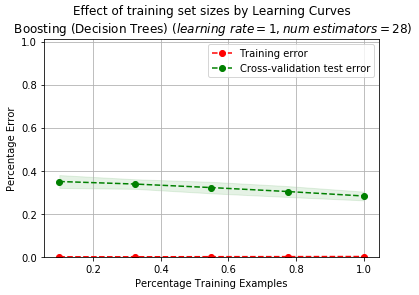

In [18]:
train_boosting(learning_rate=1, n_estimators=28, dataset_idx=0)
plt.show()
# interpret zero training error: https://stackoverflow.com/questions/15020134/how-to-calculate-alpha-if-error-rate-is-zero-adaboost

From this chart we can see that the training errors (except for max_depth=1) goes down with increasing model complexity, i.e. higher maximum number of lead nodes. In particular, the configuration max_depth=20 is successful in lowering the percentage error the most in the training scenario. However in the validation curve, all configurations of max_depth are performing simiarly, with max_depth=20 slightly better.

### Problem 2: Hyperparameter Search and Cross-Validation

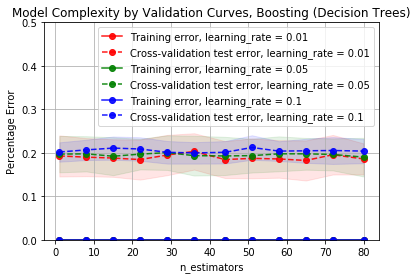

In [23]:
validate_boosting(learning_rate=0.01, color='r', dataset_idx=1)
validate_boosting(learning_rate=0.05, color='g', dataset_idx=1)
validate_boosting(learning_rate=0.1, color='b', dataset_idx=1)
plt.show()

From this chart we can see that the training errors (except for max_depth=1) goes down with increasing model complexity, i.e. higher maximum number of lead nodes. In particular, the configuration max_depth=20 is successful in lowering the percentage error the most in the training scenario. However in the validation curve, all configurations of max_depth are performing simiarly, with max_depth=20 slightly better.

In [ ]:
# validate_boosting(learning_rate=0.01, color='r', dataset_idx=2)
# validate_boosting(learning_rate=0.05, color='g', dataset_idx=2)
# validate_boosting(learning_rate=0.1, color='b', dataset_idx=2)
# plt.show()

In [ ]:
# validate_boosting(learning_rate=0.01, color='r', dataset_idx=3)
# validate_boosting(learning_rate=0.05, color='g', dataset_idx=3)
# validate_boosting(learning_rate=0.1, color='b', dataset_idx=3)
# plt.show()

### Problem 2: Effect of training set sizes and Learning Curve

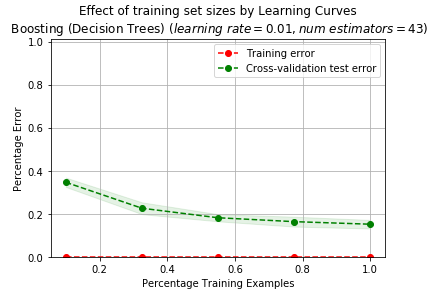

In [24]:
train_boosting(learning_rate=0.01, n_estimators=43, dataset_idx=1)
plt.show()

From this chart we can see that the training errors (except for max_depth=1) goes down with increasing model complexity, i.e. higher maximum number of lead nodes. In particular, the configuration max_depth=20 is successful in lowering the percentage error the most in the training scenario. However in the validation curve, all configurations of max_depth are performing simiarly, with max_depth=20 slightly better.

## Support Vector Machines

Kernels: rbf, poly (degree=?)

FIXME: won't stop

In [19]:
def validate_svm(kernel, color='r', dataset_idx=0):
    title = "Model Complexity by Validation Curves, SVM"
    c_range = np.linspace(1e-3, 50, 12)
    
    sample_fraction = 0.4 #0.7
    sample_size = int(sample_fraction * len(solver.datasets[dataset_idx][0]))
    X, y = solver.datasets[dataset_idx]
    random_idx = np.random.choice(X.shape[0], sample_size, replace=False)
    X, y = np.array(X)[random_idx, :], np.array(y)[random_idx]
    
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = SVC(kernel=kernel, degree=4)
    plot_validation_curve(estimator, title, X, y, "C", c_range,
                     "kernel", kernel, color, 0.9, cv=cv, ylim=(0.0, 1.01)
#                           , verbose=3
                         )

In [20]:
def train_svm(kernel, C, dataset_idx=0):
    title = f"Effect of training set sizes by Learning Curves\n SVM ($kernel={kernel}, C={C}$)"
    
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = SVC(kernel=kernel, C=C)
    plot_learning_curve(estimator, title, *solver.datasets[dataset_idx], 1, ylim=(0.00, 1.01), cv=cv, n_jobs=4)

### Problem 1: Hyperparameter Search and Cross-Validation

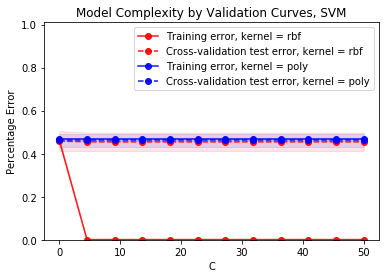

In [21]:
validate_svm(kernel='rbf', color='r', dataset_idx=0)
validate_svm(kernel='poly', color='b', dataset_idx=0)
plt.show()
# 5 + 10 minutes+
# 28 minutes

From this chart we can see that the training errors (except for max_depth=1) goes down with increasing model complexity, i.e. higher maximum number of lead nodes. In particular, the configuration max_depth=20 is successful in lowering the percentage error the most in the training scenario. However in the validation curve, all configurations of max_depth are performing simiarly, with max_depth=20 slightly better.

### Problem 1: Effect of training set sizes and Learning Curve

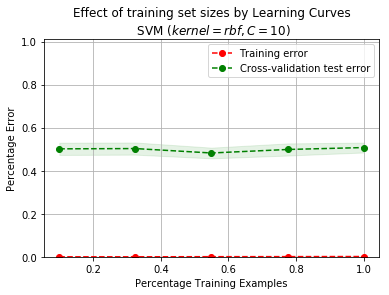

In [22]:
train_svm(kernel='rbf', C=10, dataset_idx=0)
plt.show()

From this chart we can see that the training errors (except for max_depth=1) goes down with increasing model complexity, i.e. higher maximum number of lead nodes. In particular, the configuration max_depth=20 is successful in lowering the percentage error the most in the training scenario. However in the validation curve, all configurations of max_depth are performing simiarly, with max_depth=20 slightly better.

### Problem 2: Hyperparameter Search and Cross-Validation

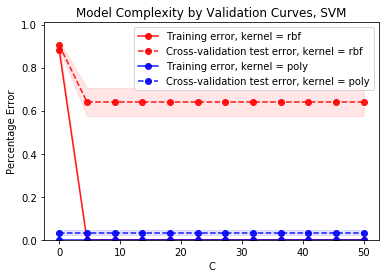

In [47]:
validate_svm(kernel='rbf', color='r', dataset_idx=1)
validate_svm(kernel='poly', color='b', dataset_idx=1)
plt.show()
# 12 minutes -> ~ 47% error straight line

From this chart we can see that the training errors (except for max_depth=1) goes down with increasing model complexity, i.e. higher maximum number of lead nodes. In particular, the configuration max_depth=20 is successful in lowering the percentage error the most in the training scenario. However in the validation curve, all configurations of max_depth are performing simiarly, with max_depth=20 slightly better.

### Problem 2: Effect of training set sizes and Learning Curve

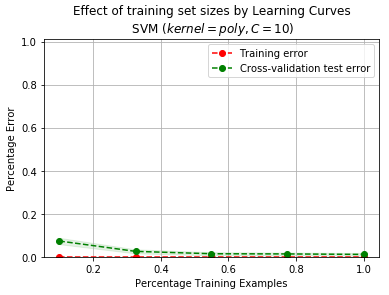

In [48]:
train_svm(kernel='poly', C=10, dataset_idx=1)
plt.show()

From this chart we can see that the training errors (except for max_depth=1) goes down with increasing model complexity, i.e. higher maximum number of lead nodes. In particular, the configuration max_depth=20 is successful in lowering the percentage error the most in the training scenario. However in the validation curve, all configurations of max_depth are performing simiarly, with max_depth=20 slightly better.

## *k*-Nearest Neighbors

In [49]:
def validate_knn(weights, color='r', dataset_idx=0):
    title = "Model Complexity by Validation Curves, $k$-Nearest Neighbors"
    n_neighbors_range = np.linspace(2, 40, 12, dtype=np.int32)[1::2]
    
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
    estimator = KNeighborsClassifier(weights=weights)
    plot_validation_curve(estimator, title, *solver.datasets[0], "n_neighbors", n_neighbors_range,
                     "weights", weights, color, 0.9, cv=cv, ylim=(0.0, 0.5))

In [50]:
def train_knn(weights, n_neighbors, dataset_idx=0):
    title = f"Effect of training set sizes by Learning Curves\n $k$-Nearest Neighbors ($weights={weights}, num\ neighbors={n_neighbors}$)"
    
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
    estimator = KNeighborsClassifier(weights=weights)
    plot_learning_curve(estimator, title, *solver.datasets[dataset_idx], 1, ylim=(0.00, 1.01), cv=cv, n_jobs=4)

### Problem 1: Hyperparameter Search and Cross-Validation

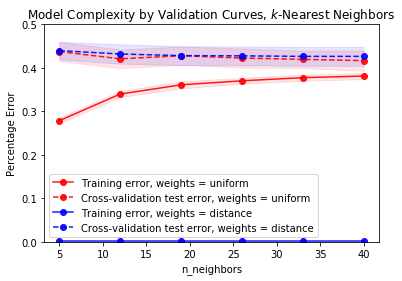

In [51]:
validate_knn(weights='uniform', color='r', dataset_idx=0)
validate_knn(weights='distance', color='b', dataset_idx=0)
plt.show()

From this chart we can see that the training errors (except for max_depth=1) goes down with increasing model complexity, i.e. higher maximum number of lead nodes. In particular, the configuration max_depth=20 is successful in lowering the percentage error the most in the training scenario. However in the validation curve, all configurations of max_depth are performing simiarly, with max_depth=20 slightly better.

### Problem 1: Effect of training set sizes and Learning Curve

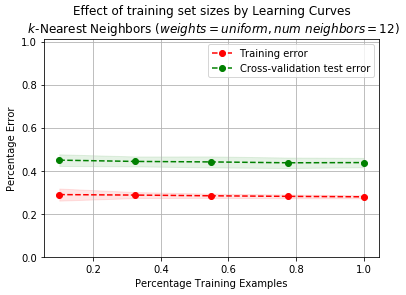

In [56]:
train_knn(weights='uniform', n_neighbors=12, dataset_idx=0)
plt.show()

From this chart we can see that the training errors (except for max_depth=1) goes down with increasing model complexity, i.e. higher maximum number of lead nodes. In particular, the configuration max_depth=20 is successful in lowering the percentage error the most in the training scenario. However in the validation curve, all configurations of max_depth are performing simiarly, with max_depth=20 slightly better.

### Problem 2: Hyperparameter Search and Cross-Validation

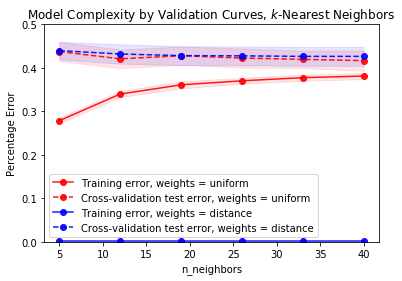

In [53]:
validate_knn(weights='uniform', color='r', dataset_idx=1)
validate_knn(weights='distance', color='b', dataset_idx=1)
plt.show()

From this chart we can see that the training errors (except for max_depth=1) goes down with increasing model complexity, i.e. higher maximum number of lead nodes. In particular, the configuration max_depth=20 is successful in lowering the percentage error the most in the training scenario. However in the validation curve, all configurations of max_depth are performing simiarly, with max_depth=20 slightly better.

### Problem 2: Effect of training set sizes and Learning Curve

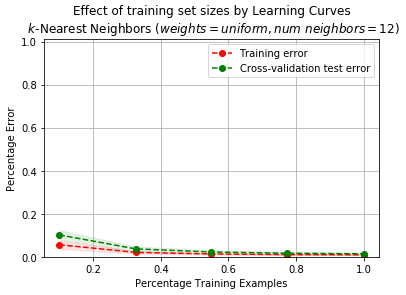

In [54]:
train_knn(weights='uniform', n_neighbors=12, dataset_idx=1)
plt.show()

From this chart we can see that the training errors (except for max_depth=1) goes down with increasing model complexity, i.e. higher maximum number of lead nodes. In particular, the configuration max_depth=20 is successful in lowering the percentage error the most in the training scenario. However in the validation curve, all configurations of max_depth are performing simiarly, with max_depth=20 slightly better.

# Conclusions

In [25]:
categories = ['DT', 'NN', 'Boosting', 'SVM', 'kNN'] 

def test_accuracies(estimators, dataset_idx=0):
    X_train, X_test, y_train, y_test = train_test_split(*solver.datasets[dataset_idx], random_state=0, test_size=0.3)
    fitted_predicted_estimators = map(lambda estimator: estimator.fit(X_train, y_train).predict(X_test), estimators)
    return list(map(lambda estimator: accuracy_score(y_test, estimator), fitted_predicted_estimators))

def plot_accuracies(accuracies, dataset_name):
    plt.title(f'Comparison of Algorithm Accuracies on {dataset_name}') 
    plt.ylabel('Accuracy')
    
    left = np.arange(len(categories))
    
    plt.xticks(left, categories)
    plt.bar(left, accuracies, width=0.3, align='center')
#     for i, y in enumerate(accuracies):
#         plt.text(x=i , y=y+0.5, s=str(accuracies), size=6)

### Problem 1: Comparison across algorithms

Best algorithm is Boosting
with accuracy 0.735973597359736


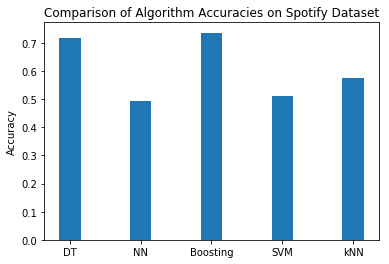

In [29]:
# Best hyperparametrised estimators
estimators = [
    DecisionTreeClassifier(max_depth=20, max_leaf_nodes=23),
    MLPClassifier(hidden_layer_sizes=np.full((5, ), 100), batch_size=112),
    AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=20), learning_rate=1, n_estimators=28
    ),
    SVC(kernel='rbf', C=10, degree=4),
    KNeighborsClassifier(weights='uniform', n_neighbors=12)
]

accuracies = test_accuracies(estimators=estimators, dataset_idx=0)
print(f"Best algorithm is {categories[np.argmax(accuracies)]}\nwith accuracy {accuracies[np.argmax(accuracies)]}")
plot_accuracies(accuracies=accuracies, dataset_name='Spotify Dataset')
plt.show() 

From this chart we can see that the training errors (except for max_depth=1) goes down with increasing model complexity, i.e. higher maximum number of lead nodes. In particular, the configuration max_depth=20 is successful in lowering the percentage error the most in the training scenario. However in the validation curve, all configurations of max_depth are performing simiarly, with max_depth=20 slightly better.

### Problem 2: Comparison across algorithms

Best algorithm is SVM
with accuracy 0.9814814814814815


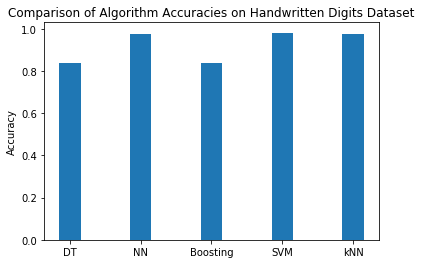

In [30]:
# Best hyperparametrised estimators
estimators = [
    DecisionTreeClassifier(max_depth=20, max_leaf_nodes=70),
    MLPClassifier(hidden_layer_sizes=np.full((5, ), 100), batch_size=26),
    AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=20), learning_rate=0.01, n_estimators=43
    ),
    SVC(kernel='poly', C=10, degree=4),
    KNeighborsClassifier(weights='uniform', n_neighbors=12)
]

accuracies = test_accuracies(estimators=estimators, dataset_idx=1)
print(f"Best algorithm is {categories[np.argmax(accuracies)]}\nwith accuracy {accuracies[np.argmax(accuracies)]}")
plot_accuracies(accuracies=accuracies, dataset_name='Handwritten Digits Dataset')
plt.show()

From this chart we can see that the training errors (except for max_depth=1) goes down with increasing model complexity, i.e. higher maximum number of lead nodes. In particular, the configuration max_depth=20 is successful in lowering the percentage error the most in the training scenario. However in the validation curve, all configurations of max_depth are performing simiarly, with max_depth=20 slightly better.

## Diagnosis
- Datasets are not an issue

## Consistency fixes
- new n_splits
- new test_set portion

## Can do Confusion Matrix

## Questions
- Dataset Choice, smaller vs larger

In [28]:
# Clean up Warning